In [24]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import cv2

5


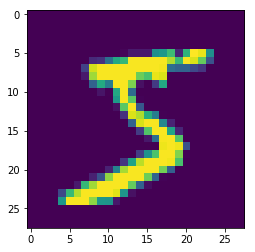

In [25]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE

plt.imshow(x_train[0])
print(y_train[0])

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.1660 - acc: 0.9524


[0.16600950236171483, 0.9524]

In [12]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
# or you can write
model.save('my-model.model')
#new_model = tf.keras.models.load_model('my-model.model')
#prediction = new_model.predict(x_train[0])
print("Saved model to disk")

Saved model to disk


In [13]:
from google.colab import files
from IPython.display import Image

x = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [32]:
imgArr = cv2.imread("output.png", 0)
imgArr = cv2.resize(imgArr, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
#print(imgArr)
imgArr = np.expand_dims(imgArr, axis=0)
#print(imgArr)
new_model = tf.keras.models.load_model('my-model.model')
prediction = new_model.predict(imgArr)
#print((prediction[0].tolist()).index(1.0))

In [33]:
print(prediction[0])

[0.01503094 0.0920779  0.08750391 0.02160671 0.02371379 0.5564784
 0.01984627 0.16058381 0.00308483 0.0200734 ]
